<a href="https://colab.research.google.com/github/akash-agarwal96/Predicting_House_Prices/blob/master/Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to work on evaluating price of houses given the follwing features:
1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude

In [93]:
!pip3 install utils
import utils



In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback



%matplotlib inline

print("Libaries imported")

Libaries imported


##Import Dataset

In [0]:
column_names = ['serial','date','age','distance','stores','latitude','longitude','price'] 

In [0]:
df = pd.read_csv('data.csv', names= column_names)

In [43]:
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


##Check Missing Data

In [44]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

##Data Normalization

In [0]:
df = df.iloc[:, 1:]

In [46]:
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [47]:
df_norm = (df - df.mean())/df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


##Convert Label Value

In [0]:
y_mean = df['price'].mean()
y_std = df['price'].std()

In [102]:
def convert_label_value(pred):
  return int(pred * y_std + y_mean)
print(convert_label_value(0.350088))  

14263


##Create Training and Test Sets

###Select Features

In [51]:
x = df_norm.iloc[:,:6]
x.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


###Select Labels

In [52]:
y = df_norm.iloc[:, -1]
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

###Feature and Label Values

In [53]:
x_arr = x.values
y_arr = y.values

print('features array shape:', x_arr.shape)
print('labels array shape:', y_arr.shape)

features array shape: (5000, 6)
labels array shape: (5000,)


###Train and Test Split

In [0]:
x_train,x_test,y_train, y_test = train_test_split(x_arr, y_arr , test_size= 0.05 , random_state = 0)

In [56]:
print('Training Set:' , x_train.shape , y_train.shape)
print('Test Set:' , x_test.shape, y_test.shape)

Training Set: (4750, 6) (4750,)
Test Set: (250, 6) (250,)


##Create the model

In [101]:
def get_model():
  model = Sequential([
      Dense(10, input_shape = (6,), activation='relu'),
      Dense(20,  activation='relu'),
      Dense(5,  activation='relu'),
      Dense(1)
  ])
  model.compile(
      loss='mse',
      optimizer='adam'
  ) 
  return model

get_model().summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_33 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


##Model Traning

In [95]:
es_cb = EarlyStopping(monitor='val_loss' , patience=5)
model = get_model()
preds_on_untrained = model.predict(x_test)

history = model.fit(
    x_train, y_train,
    validation_data =(x_test, y_test),
    epochs = 100,
    callbacks = [es_cb] 
)

Epoch 1/100
149/149 [==============================] - 1s 4ms/step - loss: 0.4383 - val_loss: 0.2153
Epoch 2/100
149/149 [==============================] - 0s 3ms/step - loss: 0.1928 - val_loss: 0.1852
Epoch 3/100
149/149 [==============================] - 0s 3ms/step - loss: 0.1735 - val_loss: 0.1685
Epoch 4/100
149/149 [==============================] - 1s 3ms/step - loss: 0.1661 - val_loss: 0.1614
Epoch 5/100
149/149 [==============================] - 0s 3ms/step - loss: 0.1635 - val_loss: 0.1603
Epoch 6/100
149/149 [==============================] - 1s 4ms/step - loss: 0.1601 - val_loss: 0.1586
Epoch 7/100
149/149 [==============================] - 0s 3ms/step - loss: 0.1589 - val_loss: 0.1573
Epoch 8/100
149/149 [==============================] - 1s 3ms/step - loss: 0.1576 - val_loss: 0.1533
Epoch 9/100
149/149 [==============================] - 0s 3ms/step - loss: 0.1569 - val_loss: 0.1526
Epoch 10/100
149/149 [==============================] - 1s 4ms/step - loss: 0.1561 - val_lo

###Plot Training and Validation Loss

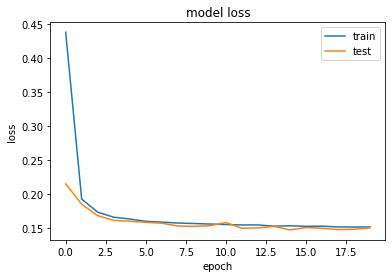

In [97]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

##Predictions

###Plot Raw Predictions

In [0]:
preds_on_trained = model.predict(x_test)
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

###Plot Price Predictions

In [0]:
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained = [convert_label_value(y) for y in preds_on_trained]
price_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_untrained, price_trained , price_test)

####Thank you